In [1]:
!pip install scikit-plot

In [2]:
!pip install xlrd

In [3]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
train_data=pd.read_excel(r'C:\Users\monish\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
test_data=pd.read_excel(r'C:\Users\monish\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx')
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# Finding The Unique Value of the Train_data
for each_col in train_data.columns:
    print(each_col)
    print(train_data[each_col].value_counts())
    print("")

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019 

In [10]:
# Finding The Unique Value of the Test_data
for each_col in test_data.columns:
    print(each_col)
    print(test_data[each_col].value_counts())
    print("")

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

Date_of_Journey
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/03/2019     65
27/05/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019

In [11]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
test_data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [13]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## We will plot The BarPlot to see the feature "Airline" with the output i.e "Price"

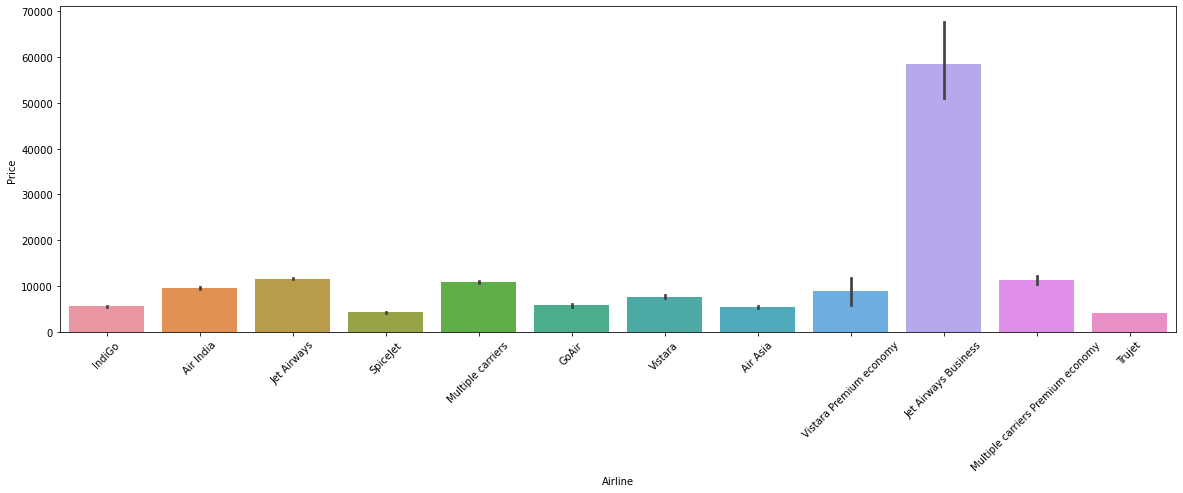

In [14]:

plt.figure(figsize=(20, 6))
sns.barplot(data=train_data, x = 'Airline', y='Price')
plt.xticks(rotation=45)
plt.show()

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

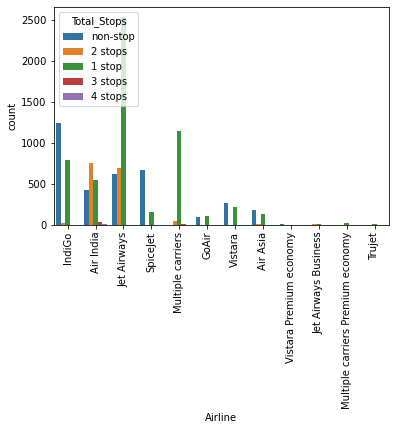

In [15]:
chart=sns.countplot(x='Airline',hue='Total_Stops',data=train_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

## Now We will Encode the "Object" Data of Train and Test data 
## Lets Look Out First that Whether both The data are "Set"

In [16]:
set(train_data['Airline'])==set(test_data['Airline'])

False

In [17]:
train_data=train_data[train_data['Airline']!='Trujet']

In [18]:
set(train_data['Airline'])==set(test_data['Airline'])

True

## Now The feature is set so that we can perform LabelEncoding

In [19]:
le=preprocessing.LabelEncoder()
train_data['Airline']=le.fit_transform(train_data['Airline'])
test_data['Airline']=le.fit_transform(test_data['Airline'])

## Now We will LabelEncode for the "Source" Feature

In [20]:
set(train_data['Source'])==set(test_data['Source'])

True

In [21]:
train_data['Source']=le.fit_transform(train_data['Source'])
test_data['Source']=le.fit_transform(test_data['Source'])

In [22]:
## We Will LabelEncode the "Destination" Feature

In [23]:
set(train_data['Destination'])==set(test_data['Destination'])

True

In [24]:
train_data['Destination']=le.fit_transform(train_data['Destination'])
test_data['Destination']=le.fit_transform(test_data['Destination'])

## We Will BoxPlot of total_stop with the price

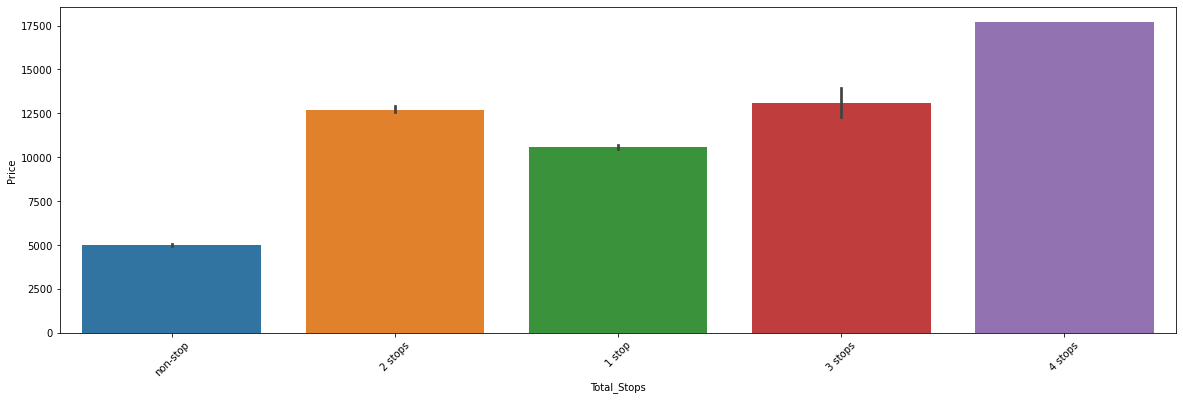

In [25]:
plt.figure(figsize=(20, 6))
sns.barplot(data=train_data, x = 'Total_Stops', y='Price')
plt.xticks(rotation=45)
plt.show()

In [26]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,1,6/05/2019,2,1,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


## We Will Drop one "NAN" of the "Total_Stops"

In [27]:
train_data=train_data[train_data['Total_Stops'].notnull()]

In [28]:
train_data['Total_Stops']=train_data['Total_Stops'].str[0]
test_data['Total_Stops']=test_data['Total_Stops'].str[0]

In [29]:
train_data['Total_Stops']=train_data['Total_Stops'].apply(lambda x:str(x) if str(x).isdigit else(0).astype(int64))
test_data['Total_Stops']=test_data['Total_Stops'].apply(lambda x:str(x) if str(x).isdigit else(0).astype(int64))

In [30]:
set(train_data['Total_Stops'])==set(test_data['Total_Stops'])

True

In [31]:
train_data['Total_Stops']=le.fit_transform(train_data['Total_Stops'])
test_data['Total_Stops']=le.fit_transform(test_data['Total_Stops'])

## Now WE will "Additional_Info" Feature

In [32]:
train_data['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [33]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [34]:
set(train_data['Additional_Info'])==set(test_data['Additional_Info'])

False

In [35]:
train_data['Additional_Info']=train_data['Additional_Info'].replace('No Info','No info')

In [36]:
train_data['Additional_Info']=train_data['Additional_Info'].replace(['2 Long layover',
                                                                    '1 Short layover',
                                                                    'Red-eye flight'],'Rare')

In [37]:
train_data=train_data[train_data['Additional_Info'] !='Rare']

In [38]:
set(train_data['Additional_Info'])==set(test_data['Additional_Info'])

True

In [39]:
train_data['Additional_Info']=le.fit_transform(train_data['Additional_Info'])
test_data['Additional_Info']=le.fit_transform(test_data['Additional_Info'])

## Now We Will Plot The Barplot to visualize the relation Between "Additional_Info" and the "Price"

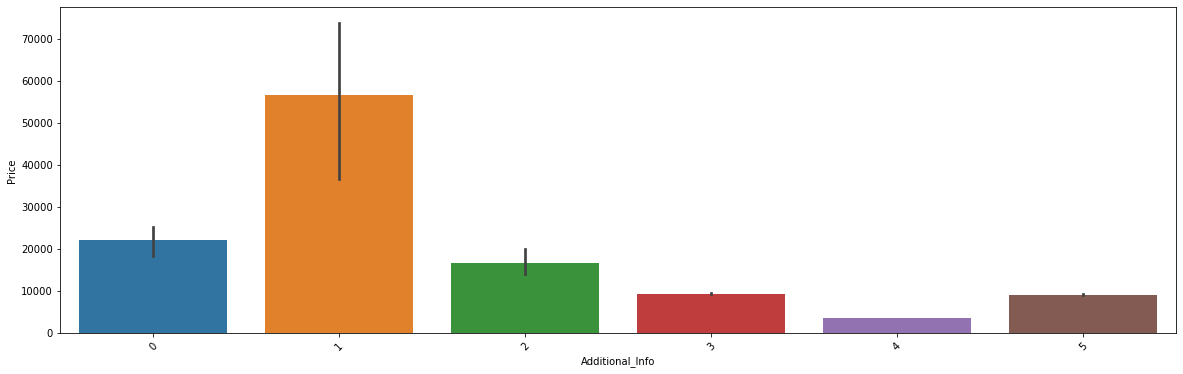

In [40]:
plt.figure(figsize=(20, 6))
sns.barplot(data=train_data, x = 'Additional_Info', y='Price')
plt.xticks(rotation=45)
plt.show()

In [41]:
## Now we will modify the "Duration Feature" in both the Train And the Test data

train_data['Duration'] = train_data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)
test_data['Duration'] = test_data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [42]:
# Now We Will Modify the "Date_of_Journey" feature in both the Train and Test data

train_data['Date_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'])
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])

## Now we will make two new columns "weekday" and "month" and perform the label encoding

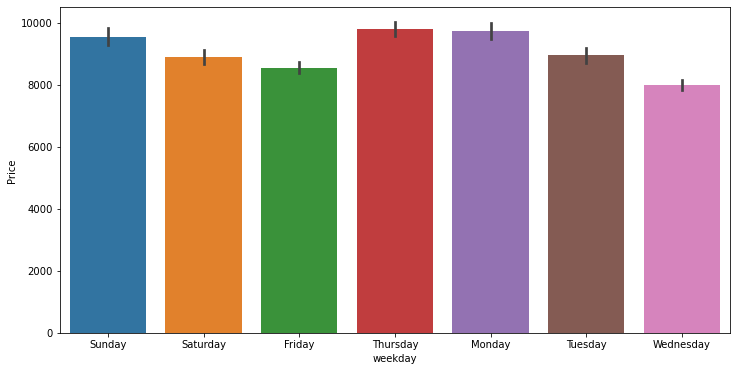

In [43]:
train_data['weekday'] = train_data['Date_of_Journey'].dt.day_name()
test_data['weekday'] = test_data['Date_of_Journey'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.barplot(data=train_data, x='weekday', y='Price')
plt.show()

train_data['weekday'] = le.fit_transform(train_data['weekday'])
test_data['weekday'] = le.transform(test_data['weekday'])

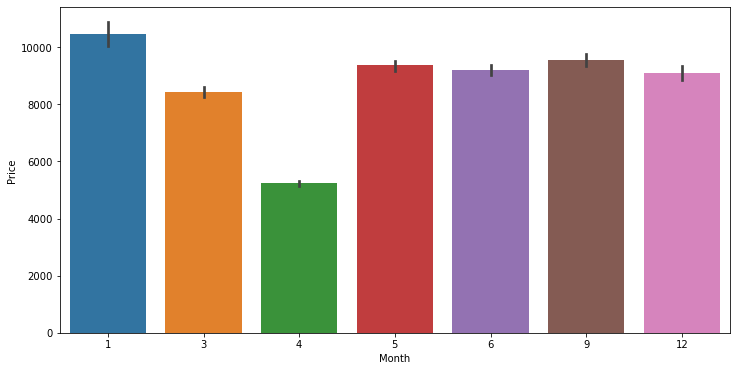

In [44]:
train_data['Month'] = train_data['Date_of_Journey'].dt.month
test_data['Month'] = test_data['Date_of_Journey'].dt.month

plt.figure(figsize=(12, 6))
sns.barplot(data=train_data, x='Month', y='Price')
plt.show()

## Now we will drop the features which will take part in building our model.

In [45]:
train_data.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)
test_data.drop(columns=['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time',], axis=1, inplace=True)

<AxesSubplot:>

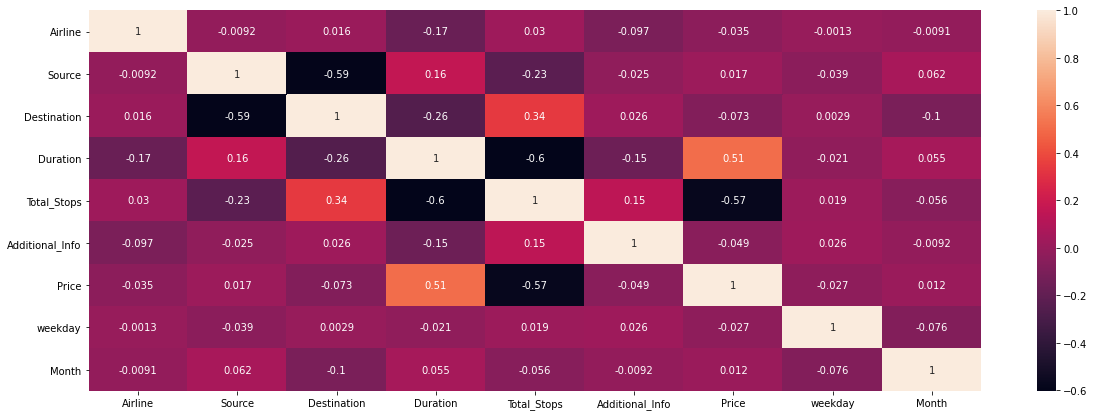

In [46]:
## we will correlate the data and visualize through heatmap
plt.figure(figsize=(20,7))
sns.heatmap(train_data.corr(), annot=True)

## Before Building The Model,We Will Arrange the columns In an Order

In [47]:
train_data = train_data[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'weekday', 'Month', 'Price']]

test_data = test_data[['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'weekday', 'Month']] 

In [48]:
train_data

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,weekday,Month,Price
0,3,0,5,170,4,5,3,3,3897
1,1,3,0,445,1,5,2,1,7662
2,4,2,1,1140,1,5,0,9,13882
3,3,3,0,325,0,5,4,12,6218
4,3,0,5,285,0,5,4,1,13302
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,4,5,6,9,4107
10679,1,3,0,155,4,5,2,4,4145
10680,4,0,2,180,4,5,2,4,7229
10681,9,0,5,160,4,5,4,1,12648


In [49]:
test_data

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,weekday,Month
0,4,2,1,655,0,5,4,6
1,3,3,0,240,0,5,4,12
2,4,2,1,1425,0,3,5,5
3,6,2,1,780,0,5,5,5
4,0,0,2,170,4,5,1,6
...,...,...,...,...,...,...,...,...
2666,1,3,0,1435,0,5,4,6
2667,3,3,0,155,4,5,6,3
2668,4,2,1,395,0,5,1,6
2669,1,2,1,915,0,5,1,6


In [50]:
train_data.skew()

Airline            0.534139
Source            -0.424736
Destination        1.245329
Duration           0.861559
Total_Stops        0.631476
Additional_Info   -1.672592
weekday           -0.064982
Month              0.629798
Price              1.811510
dtype: float64

array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Source'}>,
        <AxesSubplot:title={'center':'Destination'}>],
       [<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Total_Stops'}>,
        <AxesSubplot:title={'center':'Additional_Info'}>],
       [<AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

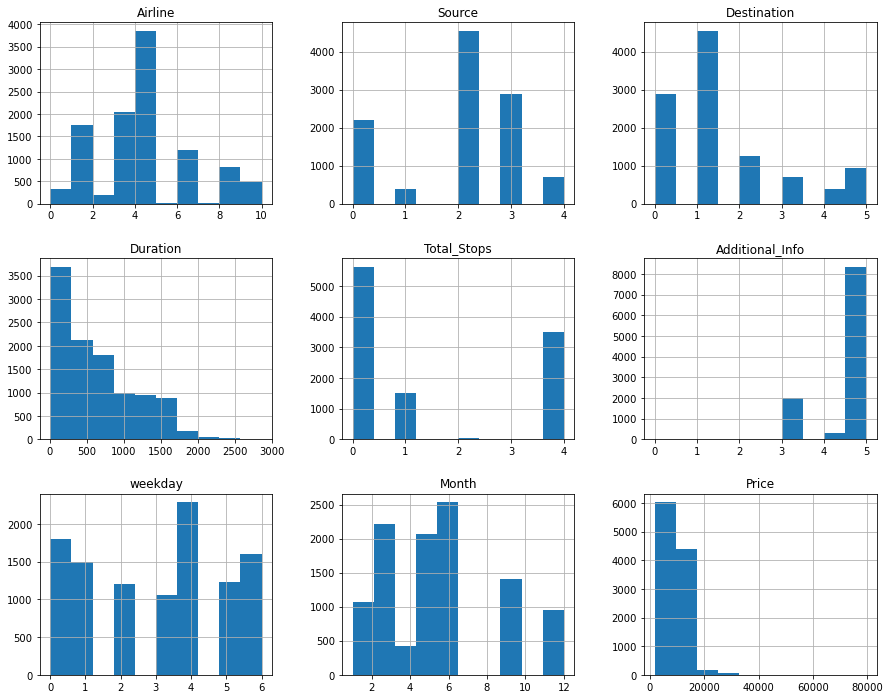

In [51]:
train_data.hist(figsize=(15,12))

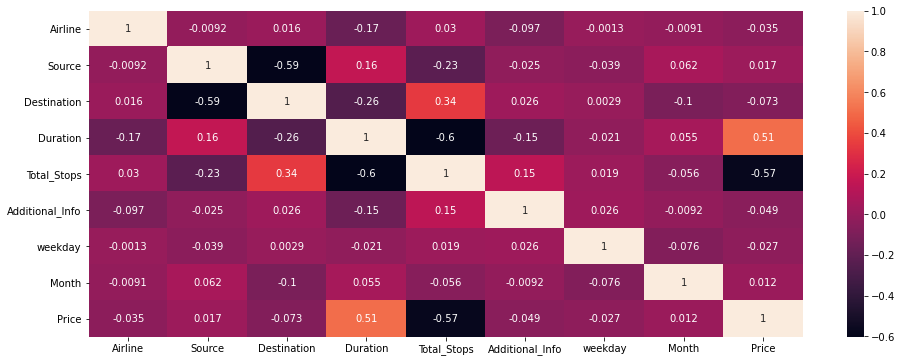

In [52]:
plt.figure(figsize=(16, 6))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

## Highest Correlation is with the "Duration" with the price

## Splitting The Data into "X" as features and "y" as Label or Vector

In [53]:

X = train_data.drop(['Price'],axis=1)
Y = train_data['Price']

In [54]:
from sklearn.model_selection import train_test_split,cross_val_score

## splitting the data into train_test_split 

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

## building the model and the cross-validation

In [56]:
# KNN Regression

knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [57]:
score=r2_score(y_test,y_pred)
score

0.5025912845582345

In [59]:
regressor=RandomForestRegressor(n_estimators = 100, random_state = 15)
regressor.fit(x_train,y_train)
y_Pred=regressor.predict(x_test)

In [60]:
scores=r2_score(y_test,y_Pred)
scores

0.781484457868457

In [61]:
cross_random_forest=cross_val_score(regressor,X,Y,cv=5)
cross_random_forest=cross_val_score(regressor,X,Y,cv=5).mean()

cross_random_forest 

0.793617200384913

In [62]:
# Logistic Regression

lr= LogisticRegression()
lr.fit(x_train, y_train)
Y_pred = lr.predict(x_test)

In [63]:
score1=r2_score(y_test,y_Pred)
score1

0.781484457868457

In [65]:
## SGDRegressor

sgd=SGDRegressor()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

In [66]:
score2=r2_score(y_test,y_Pred)
score2

0.781484457868457

In [68]:
# DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
Y_pred = dt.predict(x_test)

In [69]:
score3=r2_score(y_test,y_Pred)
score3

0.781484457868457

In [70]:
cross_dt=cross_val_score(dt,X,Y,cv=5)
cross_dt=cross_val_score(dt,X,Y,cv=5).mean()

cross_dt

0.6854668969658546

## HyperParameter Tunning

In [71]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


array = [10, 50, 100, 200, 500]

for num_trees in array:
    max_features = 5
    kfold = KFold(n_splits=10, random_state=7)
    model_1 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
    results = cross_val_score(model_1, X, Y, cv=kfold)
    print('num_trees : %f (%f)'%(num_trees, results.mean()))

num_trees : 10.000000 (0.798224)
num_trees : 50.000000 (0.801766)
num_trees : 100.000000 (0.801202)
num_trees : 200.000000 (0.803836)
num_trees : 500.000000 (0.804852)


In [73]:
max_features = 5
model_2 = RandomForestRegressor(n_estimators=200, max_features=max_features)
model_2.fit(X, Y)
predictions = model_2.predict(test_data)
predictions

array([15173.67346429,  4420.415     , 12887.5       , ...,
       15109.85      ,  9451.76458333,  8747.629     ])

## Predicting The "Price" Of The test_data

In [74]:
test_data

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,weekday,Month
0,4,2,1,655,0,5,4,6
1,3,3,0,240,0,5,4,12
2,4,2,1,1425,0,3,5,5
3,6,2,1,780,0,5,5,5
4,0,0,2,170,4,5,1,6
...,...,...,...,...,...,...,...,...
2666,1,3,0,1435,0,5,4,6
2667,3,3,0,155,4,5,6,3
2668,4,2,1,395,0,5,1,6
2669,1,2,1,915,0,5,1,6


In [75]:
test_dummy=pd.get_dummies(test_data.iloc[:,0:8])

In [76]:
regressor.fit(x_train,y_train)
predict=regressor.predict(test_dummy)

In [77]:
predict.shape

(2671,)

In [78]:
print(predict)

[15249.5995      4389.2        12898.         ... 15090.6875
 10592.20916667  8283.61      ]


In [79]:
test_dummy['Price']=predict
test_dummy

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,weekday,Month,Price
0,4,2,1,655,0,5,4,6,15249.599500
1,3,3,0,240,0,5,4,12,4389.200000
2,4,2,1,1425,0,3,5,5,12898.000000
3,6,2,1,780,0,5,5,5,12419.106024
4,0,0,2,170,4,5,1,6,3574.429333
...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1435,0,5,4,6,8321.820000
2667,3,3,0,155,4,5,6,3,4818.095268
2668,4,2,1,395,0,5,1,6,15090.687500
2669,1,2,1,915,0,5,1,6,10592.209167


## We have successfully predicted the "Price" value of the test_data